### Example of SpafHy-Peat model run
In this example the model is run with the general parameters defined in [parameters.py](parameters.py), the node-specific parameters in [example_inputs/parameters/](example_inputs/parameters/) and the forcing data files in [example_inputs/forcing/](example_inputs/forcing/). The simulation  is for 1000 nodes and covers 10 years. Node-specific parameters include:
 - [cf.dat](example_inputs/parameters/cf.dat): canopy closure [-]
 - [hc.dat](example_inputs/parameters/hc.dat): stand height [m]
 - [LAI_decid.dat](example_inputs/parameters/LAI_decid.dat), [LAI_conif.dat](example_inputs/parameters/LAI_conif.dat): one-sided leaf area index of decidious trees and conifers [m2/m2]
 - [ditch_depth.dat](example_inputs/parameters/ditch_depth.dat): ditch depth [m]
 - [ditch_spacing.dat](example_inputs/parameters/ditch_spacing.dat): ditch spacing [m]
 - [latitude.dat](example_inputs/parameters/latitude.dat), [longitude.dat](example_inputs/parameters/longitude.dat): latitude and longitude [deg]
 - [soil_id.dat](soil_id/parameters/cf.dat): id connecting node to soil profile parameterization (see parameters.peat_soilprofiles)
 - [forcing_id.dat](example_inputs/parameters/forcing_id.dat): id connecting node to forcing file in forcing folder
 
[cf.dat](example_inputs/parameters/cf.dat), [hc.dat](example_inputs/parameters/hc.dat), [LAI_decid.dat](example_inputs/parameters/LAI_decid.dat), [LAI_conif.dat](example_inputs/parameters/LAI_conif.dat) can be alternatively given for each year separately to represent stand development (value in each column represents one year). In this case, pgen['stand_development'] needs to be defined as True in [parameters.py](parameters.py).

Model has also alternatives to be run with a single forcing file, stand parameterization or soil parameterization. For alternatives see [parameters.py](parameters.py).

##### Running model

In [1]:
from model_driver import driver

outputfile = driver(create_ncf=True, folder='example_inputs')

*** Running model ***
*** Writing results to netCDF4-file, subset 1/10 ***
*** Writing results to netCDF4-file, subset 2/10 ***
*** Writing results to netCDF4-file, subset 3/10 ***
*** Writing results to netCDF4-file, subset 4/10 ***
*** Writing results to netCDF4-file, subset 5/10 ***
*** Writing results to netCDF4-file, subset 6/10 ***
*** Writing results to netCDF4-file, subset 7/10 ***
*** Writing results to netCDF4-file, subset 8/10 ***
*** Writing results to netCDF4-file, subset 9/10 ***
*** Writing results to netCDF4-file, subset 10/10 ***
--- Running time 23.07 seconds ---
--- Results are in file: results/example_inputs.nc ---


##### Reading results
Model results are written in netCDF4-file, which can be imported as axarray. Output variables stored during simulation can be controlled in parameters.py.

In [2]:
from iotools import read_results

results = read_results(outputfile)

print(results)

<xarray.Dataset>
Dimensions:                         (date: 3651, i: 1, j: 1000)
Coordinates:
  * date                            (date) datetime64[ns] 1982-01-02 ... 1991...
  * i                               (i) int32 0
  * j                               (j) int32 0 1 2 3 4 ... 995 996 997 998 999
Data variables:
    parameters_lai_conif            (i, j) float32 ...
    parameters_lai_decid_max        (i, j) float32 ...
    parameters_cf                   (i, j) float32 ...
    parameters_ditch_depth          (i, j) float32 ...
    parameters_ditch_spacing        (i, j) float32 ...
    parameters_lat                  (i, j) float32 ...
    parameters_lon                  (i, j) float32 ...
    forcing_air_temperature         (date, i, j) float32 ...
    forcing_precipitation           (date, i, j) float32 ...
    forcing_vapor_pressure_deficit  (date, i, j) float32 ...
    forcing_global_radiation        (date, i, j) float32 ...
    forcing_CO2                     (date, i, j) flo

##### Plotting some results
Figures show ground water level [m] and canopy transpiration [mm/d] for 10 first nodes.

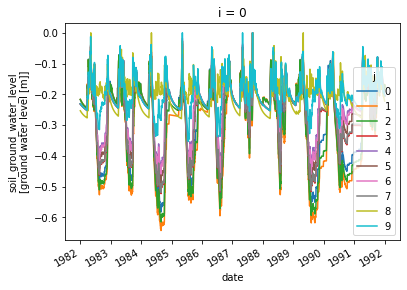

In [3]:
fig = results['soil_ground_water_level'][:,0,:10].plot.line(x='date')

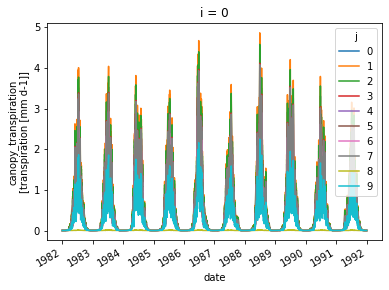

In [4]:
fig = results['canopy_transpiration'][:,0,:10].plot.line(x='date')